## Example script | PyFrag Plotter
This notebook acts as an example of how to use the "pyfrag_plotter" package to plot the results of a PyFrag calculation.

### Prequirements:
- Installation of the "pyfrag_plotter" package
> `python -m pip install pyfrag_plotter`

### Requirements for running the script: 
- Directory containing the relevant PyFrag files, being the inputfile (.in) and the outputfile (pyfrag_*.txt)

### Flow of the program:
- Initialize the config file
- Load the PyFrag output file and input file. This will create a dataframe that contains all the information from the PyFrag output file, and a dictionary that contains all the information from the PyFrag input file.
- Process the dataframe by trimming data, removing dispersion key, removing outliers and more
- Make a PyFragResults object that combines the specifications in the PyFrag input file with the unclear header keys (such as overlap_1) in processed dataframe

From here, you can choose to plot or to interpolate. The plotting function will plot the results of the PyFrag calculation, and the interpolation function will interpolate at a specified point of on the chosen IRC coordinate. The interpolation function is not yet implemented.

## Start the program!

In [1]:
# Load the modules
import os
from pyfrag_plotter import initialize_pyfrag_plotter
from pyfrag_plotter.pyfrag_object import create_pyfrag_object_from_dir
from pyfrag_plotter.plot.plotter import Plotter

Next, we specify the following paths:
- pyfrag_dir: the directory where the pyfrag output file is located. For example, the .in and .txt file are located in pyfrag_dir/[calculation1]/*.in
- plot_dir: the directory where the plots will be saved
- config_file: path to the config file that we use for initializing the pyfrag_plotter package

For this example, we assume that the pyfrag directory (the directory containing the calcultions) is one directory above this notebook
Also, we assume that the plot_dir and configfile is in the same directory as this notebook

In [2]:
current_dir_path = os.getcwd()
pyfrag_dir = os.path.abspath(os.path.join(current_dir_path, ".."))
plot_dir = os.path.join(current_dir_path, "Example_plots")
config_file = os.path.join(current_dir_path, "example_config.ini")

result_dirs = ["ureas_di_O_Cs_all", "ureas_di_O_Cs_pi", "ureas_di_O_Cs_sigma",]
pyfrag_dirs = [os.path.join(pyfrag_dir, directory) for directory in result_dirs]

irc_coord = ("bondlength_1", "r - r$_{eq}$ / Å")
# irc_coord = ("bondlength_2", "r$_{cm}$ / Å")
# irc_coord = ("bondlength_3", "$\Delta$r$_{X \cdot\cdot\cdot H}$ / Å")
# irc_coord = ("bondlength_4", "r$_{X \cdot\cdot\cdot H}$ / Å")   # type: ignore # noqa: W605 since it is a LaTeX string

With that all set, we can initialize the pyfrag_plotter package with the initialize_pyfrag_plotter function using the config file. In this file, you can specify plot settings, such as the font, font size, figure size, etc, but also which eda keys to plot, and until which energy value (dEint) to plot.

If you have a specific config file you want to use, you can provide it as an argument to the initialize_pyfrag_plotter function. If you don't provide a config file, the default config file will be used that is part of the package.

In [3]:
# First, initialize the config file
initialize_pyfrag_plotter(user_config_file=config_file)


x_lim -0.5, 0.5
y_lim -25, 25
colours black, #FF7E79, #0096FF, orange, green, yellow, lime, gold, brown, fuchsia
line_styles solid, dashed, dotted, dashdot, -.
outlier_threshold 50
trim_option x_lim
trim_option x_lim ['min', 'max', 'x_lim', 'false']
vline 0.00
reverse_x_axis false
reverse_x_axis false ['false', 'true']
trim_key bondlength_1
stat_point_type min
stat_point_type min ['min', 'max', 'none']
n_interpolation_points 50
eda_keys Int, Elstat, OI, Pauli, Disp
eda_keys Int, Elstat, OI, Pauli, Disp ['Int', 'Pauli', 'Elstat', 'OI', 'Disp']
asm_keys EnergyTotal, Int, StrainTotal
asm_keys EnergyTotal, Int, StrainTotal ['EnergyTotal', 'StrainTotal', 'Int']
asm_strain_keys StrainTotal, frag1Strain, frag2Strain
asm_strain_keys StrainTotal, frag1Strain, frag2Strain ['StrainTotal', 'frag1Strain', 'frag2Strain']
fig_size 12, 10
font arial
font_size 24


The settings are now internally loaded. We can move on to loading the data. We do this with the create_pyfrag_object_from_dir. This function takes the pyfrag_dir as an argument, loads the *in and pyfrag_*txt files, and returns pyfrag object.

Under the hood the data in the .txt file is loaded into a pandas dataframe, and the data in the .in file is loaded into a dictionary. The dataframe is processed by removing outliers, trimming the data, and removing the dispersion key. Try supplying the following arguments in the create_pyfrag_object_from_dir function:
- trim_option: until which point, or between which domain the data should be trimmed to. Options are "max", or "min", or "x_limits", or none"
- trim_key: the key to trim on, for example "EnergyTotal", or "bondlength_1" if you also supply the trim_option "x_limits"
- outlier_threshold: the threshold for removing outliers. For example, 0.1 means that all values that are more than 0.1 away from the two nearest values are removed

In [4]:
objs = [create_pyfrag_object_from_dir(pyfrag_dir) for pyfrag_dir in pyfrag_dirs]

# Plotting

Now let's do some plotting! 

Make an instance of the MultiPlotter by providing the directory in which the data is stored and the name of the corresponding output folder. Also, provide the PyFragResultsObjects and the irc coordinate on which the data should be plotted. The Multiplotter is able to plot ASM, EDA and ASM extra strain curves. You can even provide the keys that should be plotted, such as "EnergyTotal" or "Int" (they should match the keys in the pyfrag_*.txt resultsfile).

INFO:root:Plot function plot_asm called. Execution time: 1.44 seconds.
INFO:root:Plot function plot_eda called. Execution time: 1.52 seconds.
INFO:root:Plot function plot_extra_strain called. Execution time: 1.28 seconds.


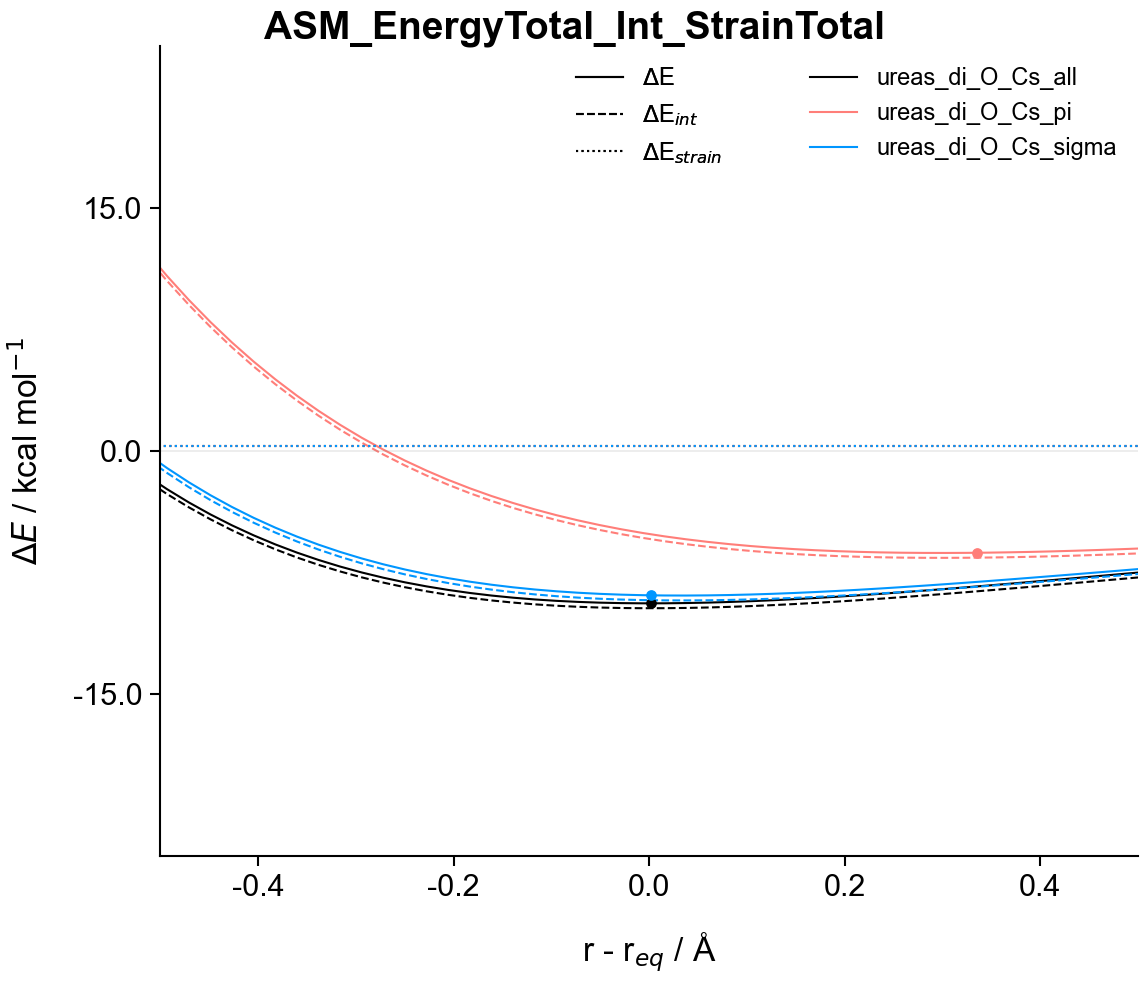

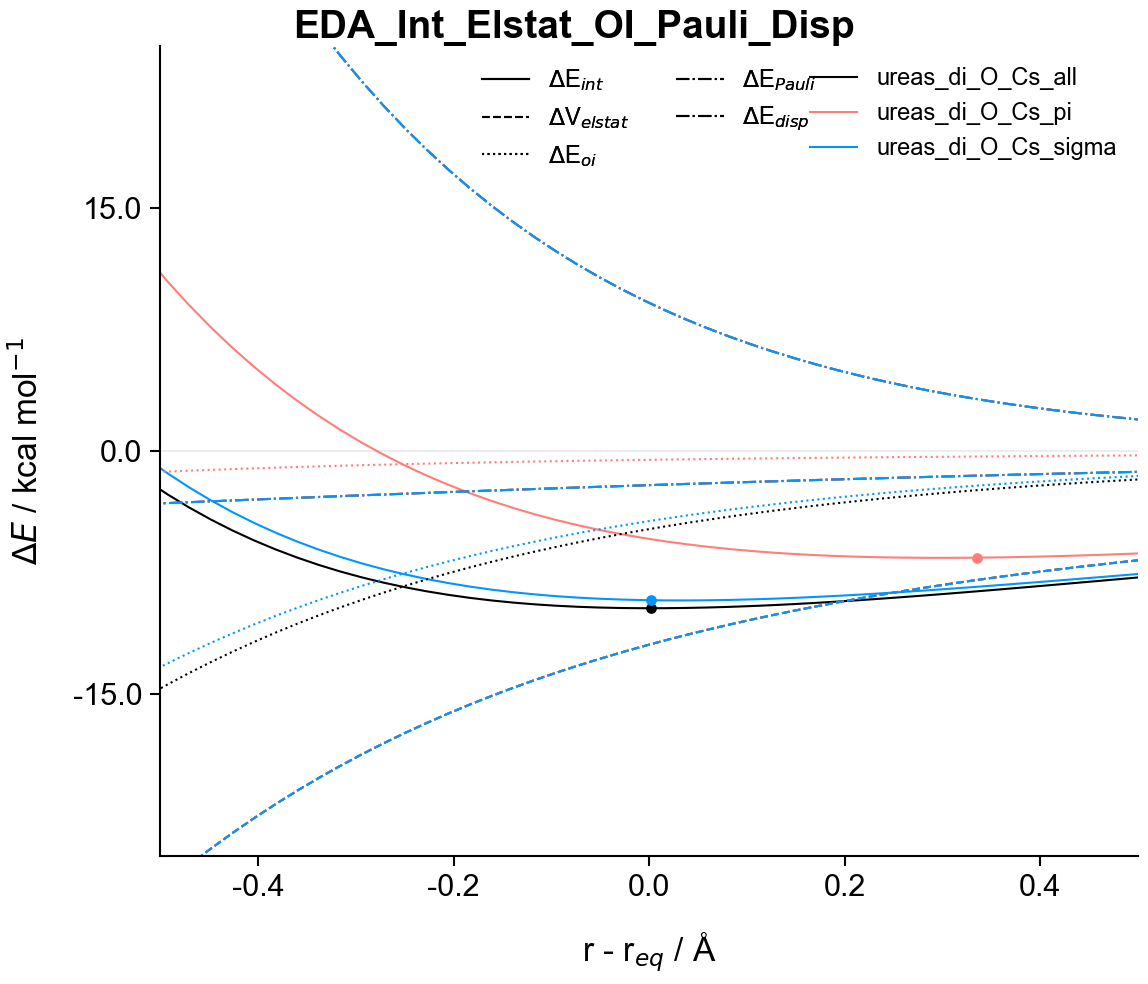

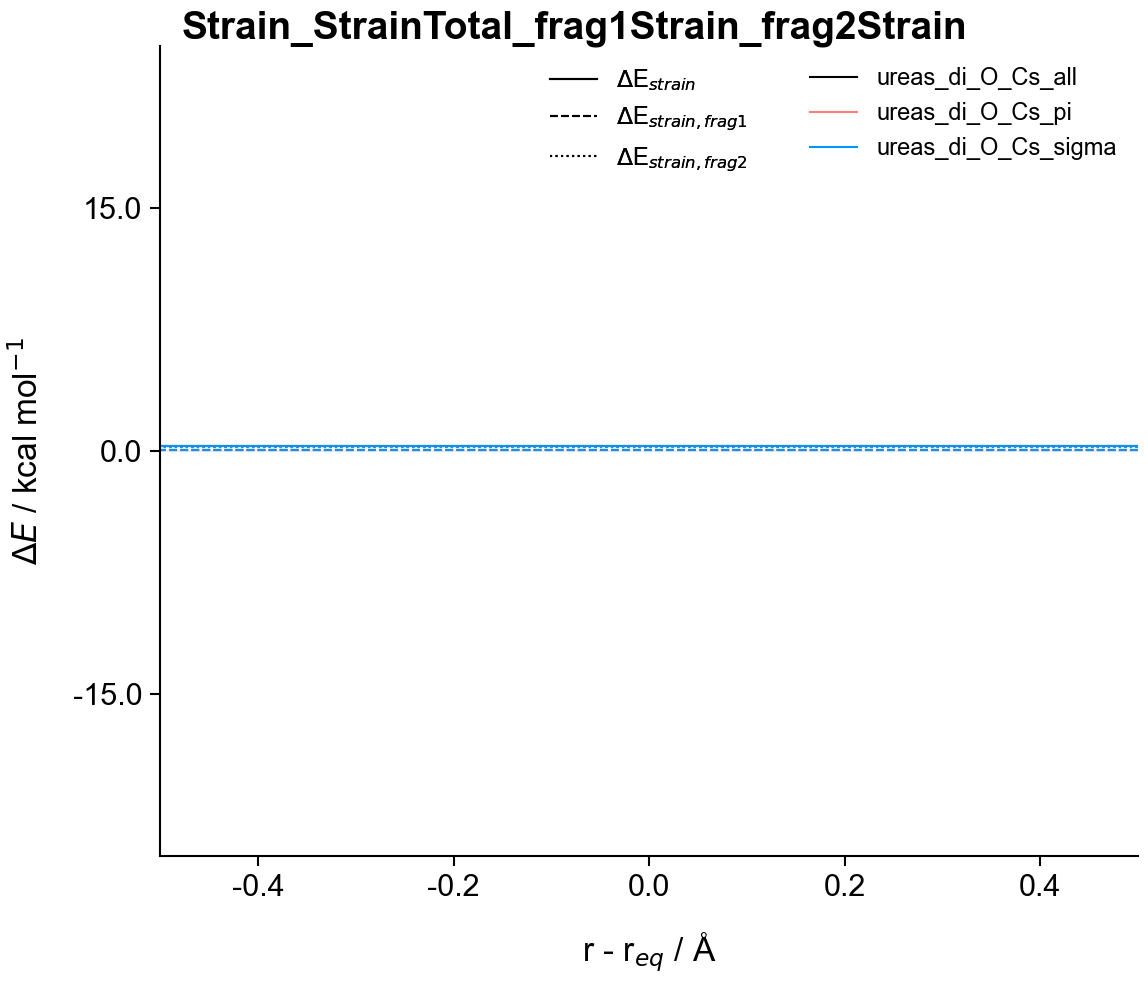

In [5]:
plot_inst = Plotter(name="plot_all_O_tri_ureas", plot_dir=plot_dir, pyfrag_objects=objs, irc_coord=("bondlength_1",  "r - r$_{eq}$ / Å"))

with plot_inst as plotter:
    plotter.plot_asm()  # ["EnergyTotal"]
    plotter.plot_eda()
    plotter.plot_extra_strain()